In [1]:
from preprocessing import *
from import_data import *
from plotting import *
data_dir = 'DataCollection/outputs/'
ssvep_dir = data_dir + 'SSVEP/sess3/'
col_names = ['Time','Fp1', 'O1', 'O2','C3','C4','P3','P4','Pz']
ssvep_files = get_files(ssvep_dir)

In [2]:
ssvep_files

['DataCollection/outputs/SSVEP/sess3/.ipynb_checkpoints',
 'DataCollection/outputs/SSVEP/sess3/2023-03-10T14:47:20.913143_baseline.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-10T14:47:20.913143_data.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-10T14:47:20.913143_metadata.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-10T14:55:08.474247_baseline.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-10T14:55:08.474247_data.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-10T14:55:08.474247_metadata.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-13T21:07:08.290780_baseline.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-13T21:07:08.290780_data.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-13T21:07:08.290780_metadata.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-13T21:08:32.151216_baseline.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-13T21:08:32.151216_data.txt',
 'DataCollection/outputs/SSVEP/sess3/2023-03-13T21:08:32.151216_metadata.txt']

In [3]:
eeg_data = read_file(ssvep_files[2],col_names)

In [4]:
eeg_data

,Time,Fp1,O1,O2,C3,C4,P3,P4,Pz
0,282100.426963,5139.828125,-22348.011719,-3630.392578,-10867.999023,-15533.948242,1681.387573,-25343.906250,-23204.933594
1,282100.430963,5088.061523,-22358.919922,-3708.556641,-10813.975586,-15546.710938,1772.381592,-25314.111328,-23195.343750
2,282100.434963,5120.985840,-22289.941406,-3794.566162,-10805.101562,-15569.286133,1770.839355,-25259.662109,-23184.660156
3,282100.438963,5137.548340,-22317.748047,-3712.222412,-10830.269531,-15574.315430,1719.765625,-25309.259766,-23197.781250
4,282100.442963,5144.120117,-22365.937500,-3621.183838,-10857.740234,-15550.868164,1688.026123,-25345.515625,-23210.878906
...,...,...,...,...,...,...,...,...,...
24182,282197.067467,6162.241699,-22051.539062,-3340.065918,-10361.843750,-15940.101562,1931.995361,-25104.070312,-22735.054688
24183,282197.071467,6178.536133,-22020.603516,-3356.203857,-10340.050781,-15936.771484,1962.460815,-25088.871094,-22727.455078
24184,282197.075467,6164.365234,-21966.847656,-3428.511719,-10307.395508,-15947.456055,1998.715332,-25058.183594,-22713.955078
24185,282197.079467,6166.555664,-21994.072266,-3411.613770,-10320.850586,-15948.416992,1973.346069,-25067.906250,-22719.675781


In [5]:
t1 = 282106.67148749996
t2 = 282111.689516167
bl_df = eeg_data[(eeg_data['Time'] >= t1) & (eeg_data['Time'] <= t2)]

In [6]:
bl_df

,Time,Fp1,O1,O2,C3,C4,P3,P4,Pz
1568,282106.674524,5215.332520,-22440.525391,-3814.816895,-10866.613281,-15668.774414,1656.465454,-25378.527344,-23174.757812
1569,282106.675487,5191.840820,-22353.957031,-3940.903076,-10813.416016,-15684.017578,1720.570190,-25333.623047,-23156.787109
1570,282106.679487,5189.113770,-22391.240234,-3911.130615,-10836.572266,-15685.000977,1686.126221,-25358.322266,-23167.046875
1571,282106.683488,5211.219727,-22444.080078,-3851.563232,-10862.433594,-15673.535156,1655.839600,-25390.732422,-23181.128906
1572,282106.687488,5214.103027,-22430.289062,-3867.790527,-10842.093750,-15674.362305,1683.712158,-25373.410156,-23174.556641
...,...,...,...,...,...,...,...,...,...
2813,282111.644050,5322.240723,-22318.351562,-3913.052734,-10778.234375,-15660.548828,1742.743164,-25313.507812,-23094.113281
2814,282111.648050,5325.325684,-22372.933594,-3859.118164,-10811.360352,-15654.290039,1700.096069,-25345.984375,-23109.669922
2815,282111.652050,5339.787109,-22410.060547,-3808.580811,-10827.364258,-15640.230469,1683.421631,-25361.496094,-23117.537109
2816,282111.656050,5339.943359,-22357.869141,-3863.320312,-10794.841797,-15643.449219,1724.884155,-25331.566406,-23103.298828


In [7]:
def read_metadata(md_file):
    dictionary = {}
    with open(md_file, 'r') as file:
        file.readline()
        for line in file:
            key, value = line.split(':', 1)
            values_list = [float(v.strip()) for v in value.split(',')]
            dictionary[key.strip()] = values_list
    return dictionary

In [8]:
def make_data(eeg_data, md_dict):
    data_dict = {}
    for key,times in md_dict.items():
        data_dict[key] = eeg_data[(eeg_data['Time'] >= times[0]) & (eeg_data['Time'] <= times[1])]
    return data_dict

In [9]:
md_dict = read_metadata(ssvep_files[3])

In [10]:
for key,val in md_dict.items():
    print(key, val)

baseline [282106.67148749996, 282111.689516167]
15.6 [282111.701516167, 282115.22482704197]
14.8 [282120.253956125, 282123.740680292]
10.8 [282128.78369625, 282132.267237959]
9.2 [282137.331069625, 282140.819844834]
13.2 [282145.8554087091, 282149.332814542]
11.6 [282154.377630834, 282157.90963074996]
12.4 [282162.964341459, 282166.498277917]
10.0 [282171.512498084, 282175.052905834]
14.0 [282180.0799585421, 282183.532680667]
8.4 [282188.544254042, 282192.065408709]


In [11]:
data_dict = make_data(eeg_data, md_dict)

In [16]:
def get_filt_data(data_dict, freq, Fs=250, low=1, high=100):
    baseline = data_dict['baseline']
    freq_data = data_dict[str(freq)]
    bc = baseline_correct(freq_data,baseline)
    filt = filter_eeg(bc, Fs, low, high)
    return filt

In [41]:
baseline = data_dict['baseline']

In [59]:
freq1 = data_dict['15.6']

In [60]:
freq1

,Time,Fp1,O1,O2,C3,C4,P3,P4,Pz
2820,282111.705516,5313.993164,-22362.562500,-3876.105469,-10790.214844,-15654.692383,1709.260254,-25337.087891,-23106.541016
2821,282111.709516,5329.192383,-22399.957031,-3800.936523,-10820.770508,-15639.269531,1682.102905,-25363.441406,-23115.771484
2822,282111.713516,5350.180664,-22371.726562,-3811.620605,-10803.760742,-15635.202148,1710.422485,-25343.345703,-23106.472656
2823,282111.717516,5349.286621,-22317.568359,-3890.902344,-10774.658203,-15646.958984,1743.927856,-25311.875000,-23094.537109
2824,282111.721516,5330.846191,-22340.792969,-3897.406738,-10793.523438,-15649.037109,1714.848145,-25326.761719,-23104.574219
...,...,...,...,...,...,...,...,...,...
3702,282115.211621,5469.539062,-22373.693359,-3774.695557,-10751.635742,-15629.546875,1726.940430,-25323.296875,-23070.398438
3703,282115.215621,5466.074219,-22315.982422,-3836.945068,-10719.315430,-15637.973633,1770.213501,-25291.558594,-23053.566406
3704,282115.219621,5448.640137,-22290.298828,-3888.443604,-10707.983398,-15646.936523,1778.438843,-25271.843750,-23046.279297
3705,282115.223621,5454.943359,-22344.570312,-3808.714844,-10747.545898,-15638.331055,1731.321411,-25296.140625,-23059.869141


In [61]:
bc_freq1 = baseline_correct(freq1, baseline)

In [62]:
bc_freq1

,Time,Fp1,O1,O2,C3,C4,P3,P4,Pz
2820,2.525220,46.366940,8.276483,-17.677625,17.606914,-12.785652,-10.707019,-1.465083,18.603450
2821,2.529220,61.566159,-29.118048,57.491321,-12.948750,2.637200,-37.864368,-27.818598,9.372981
2822,2.533220,82.554440,-0.887580,46.807238,4.061016,6.704583,-9.544788,-7.722895,18.671809
2823,2.537220,81.660397,53.270623,-32.474500,33.163555,-5.052253,23.960583,23.747808,30.607356
2824,2.541220,63.219968,30.046014,-38.978894,14.298320,-7.130378,-5.119129,8.861089,20.570247
...,...,...,...,...,...,...,...,...,...
3702,6.031325,201.912839,-2.854377,83.732287,56.186016,12.359856,6.973156,12.325933,54.746028
3703,6.035325,198.447995,54.856561,21.482776,88.506328,3.933098,50.246228,44.064214,71.578059
3704,6.039325,181.013913,80.540155,-30.015760,99.838359,-5.029792,58.471570,63.779058,78.865169
3705,6.043325,187.317136,26.268670,49.713000,60.275859,3.575677,11.354138,39.482183,65.275325


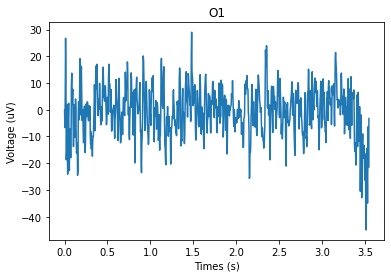

In [63]:
low = 1
high = 100
filt = filter_eeg(bc_freq1, 250, low, high)
plot_channel(filt, channel='O1', Fs=250, start=0, end=5)

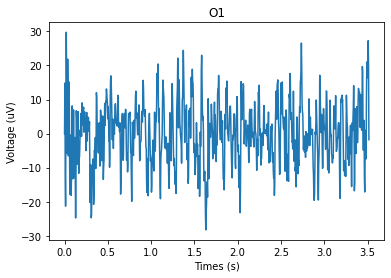

In [23]:
# 15.6, 14.8, 10.8, 9.2
filt = get_filt_data(data_dict, 9.2)
plot_channel(filt, channel='O1', Fs=250, start=0, end=5)

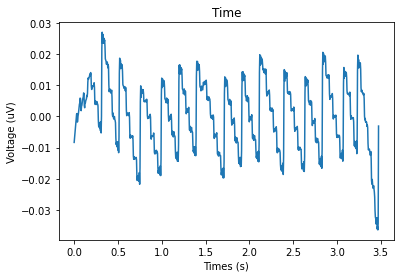

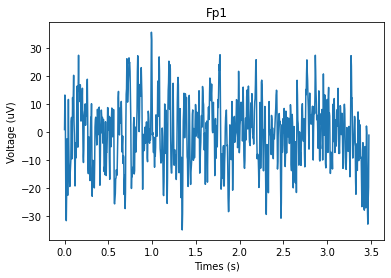

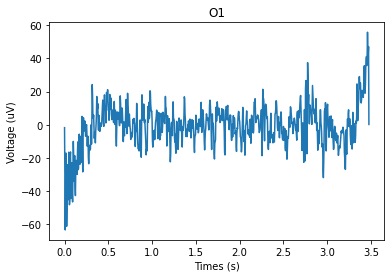

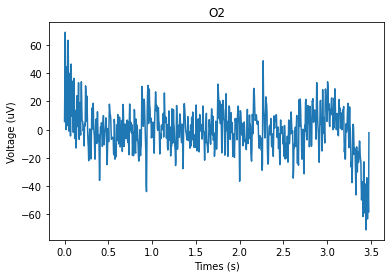

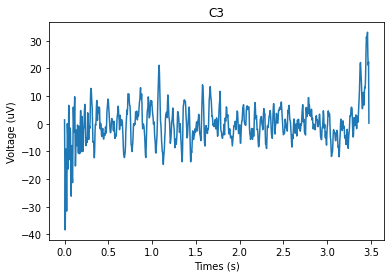

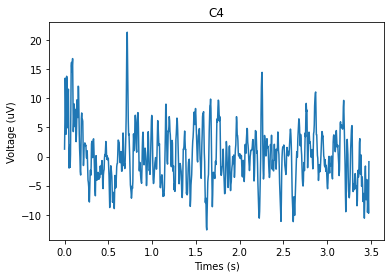

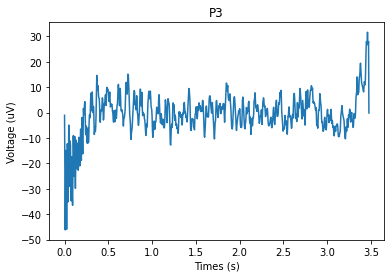

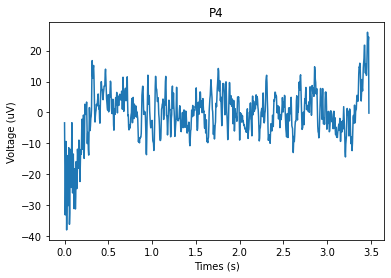

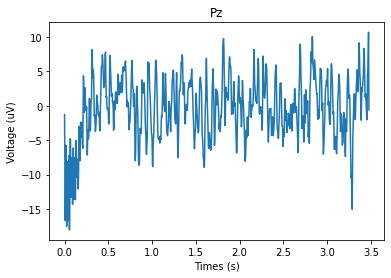

In [22]:
plot_ssvep(filt)

In [64]:
freqs, ps = power_spectrum(filt, 250)

(0.0, 5.0)

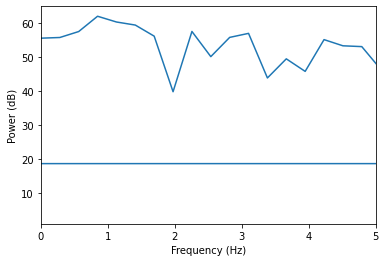

In [65]:
plot_power(freqs, ps, 'O1', 250, 100)
plt.xlim(0,5)

In [66]:
k = 2.22
mystr = "{:.1f}: a".format(k)
mystr

'2.2: a'